In [ ]:
import numpy as np

import gym

import matplotlib.pyplot as plt
%matplotlib inline

https://gym.openai.com/docs/

## Load GYM environment

In [ ]:
env = gym.make('FrozenLake-v0', is_slippery=False) #создается среда для игры FrozenLake

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 16
Actions: 4


In [ ]:
USE_Q = False # во время симуляции будет обучение с учетом Q-политика

s = env.reset()

for _ in range(1000):
    env.render() #рисует текущее состояние игры куда-то
    if USE_Q:
        a = np.argmax(Q[s,:])
    else:
        a = env.action_space.sample() #случайное действие
    s, r, done, _ = env.step(a) #применяем действие и получаем состояние и наградую done - продолжаем ли мы действия
    if done:
        env.render()
        print('Reward = {}'.format(r))
        break
        
env.close()


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Reward = 0.0


## Settings

In [ ]:
lr = 0.8
gamma = 0.95 #дисконтирование

NUM_EPISODES = 3000
MAX_STEPS = 100 # сколько мксимально шаговв каждой цепочке
REWARD_AVERAGE_WINDOW = 20 #параметр, чтобы считать среднюю награду по n=20 цепочкам

##  Q-Table initialization

In [ ]:
Q = np.zeros([NUM_STATES, NUM_ACTIONS]) #инициализируем 0 q-таблицу

pathLenList = []
totalRewardList = []
totalRewardAverageList = []

##  Q-Table learning

In [ ]:
for i in range(NUM_EPISODES):
    
    eps = 1.0 - float(i) / NUM_EPISODES

    s = env.reset()

    totalReward = 0
    step = 0

    while step < MAX_STEPS:
        step += 1
        
        if np.random.rand() < eps:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[s,:])
        
        s1, r, done, _ = env.step(a)
        
        if done:
            Q_target = r
        else:
            Q_target = r + gamma * np.max(Q[s1,:])
            
        Q[s,a] = (1-lr) * Q[s,a] + lr * Q_target
        
        totalReward += r
        s = s1
        
        if done:
            break
            
    pathLenList.append(step)
    totalRewardList.append(totalReward)
    
    if i % REWARD_AVERAGE_WINDOW == 0 and i >= REWARD_AVERAGE_WINDOW:
        totalRewardAverage = np.mean(totalRewardList[-REWARD_AVERAGE_WINDOW:])
        totalRewardAverageList.append(totalRewardAverage)
        if i % 100 == 0:
            print('Episode {}: average total reward = {}'.format(i, totalRewardAverage))

Episode 100: average total reward = 0.0
Episode 200: average total reward = 0.05
Episode 300: average total reward = 0.05
Episode 400: average total reward = 0.0
Episode 500: average total reward = 0.1
Episode 600: average total reward = 0.1
Episode 700: average total reward = 0.0
Episode 800: average total reward = 0.2
Episode 900: average total reward = 0.15
Episode 1000: average total reward = 0.1
Episode 1100: average total reward = 0.2
Episode 1200: average total reward = 0.2
Episode 1300: average total reward = 0.5
Episode 1400: average total reward = 0.45
Episode 1500: average total reward = 0.45
Episode 1600: average total reward = 0.6
Episode 1700: average total reward = 0.6
Episode 1800: average total reward = 0.35
Episode 1900: average total reward = 0.65
Episode 2000: average total reward = 0.7
Episode 2100: average total reward = 0.6
Episode 2200: average total reward = 0.7
Episode 2300: average total reward = 0.65
Episode 2400: average total reward = 0.85
Episode 2500: av

## Q-Table

In [ ]:
print(Q)

[[0.73509189 0.77378094 0.77378094 0.73509189]
 [0.73509189 0.         0.81450625 0.77378094]
 [0.77378094 0.857375   0.77378094 0.81450625]
 [0.81450625 0.         0.77378094 0.77378094]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.81450625]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.857375   0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]


## Plot trajectory length over time

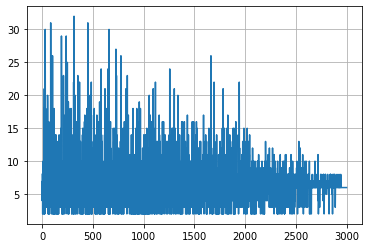

In [ ]:
plt.plot(pathLenList)
plt.grid()

## Plot average total reward over time

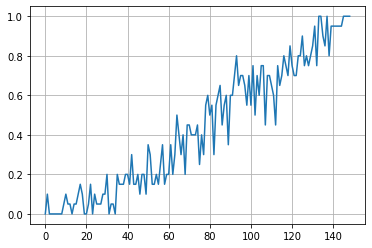

In [ ]:
plt.plot(totalRewardAverageList)
plt.grid()

## Run simulation

In [ ]:
USE_Q = True # во время симуляции будет обучение с учетом Q-политика

s = env.reset()

for _ in range(1000):
    env.render()
    if USE_Q:
        a = np.argmax(Q[s,:])
    else:
        a = env.action_space.sample()
    s, r, done, _ = env.step(a)
    if done:
        env.render()
        print('Reward = {}'.format(r))
        break
        
env.close()


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Reward = 1.0
